<a href="https://colab.research.google.com/github/emelyck/Metodos_DynnaRangel_SamuelRomero/blob/main/parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

campo gravitacional cuando (0, 0, 0.2): -15025.81903 m/s²


<ipython-input-3-9ae931a05654>:19: RuntimeWarning: invalid value encountered in scalar power
  return r * z / ((x**2 + y**2 + z**2 - 2 * x * r * np.cos(phi) - 2 * y * r * np.sin(phi))**(3/2))


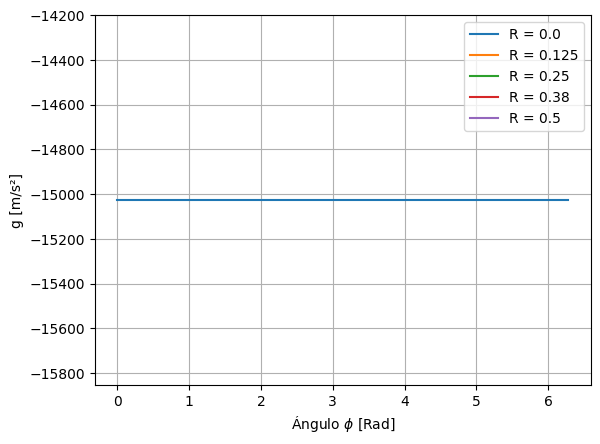

In [3]:
#punto 24
import numpy as np
from scipy.special import roots_legendre
import matplotlib.pyplot as plt

k = 1.9429303960
z = 0.2
R = 1

#a
N = 50
puntos, pesos = roots_legendre(N)
phi_p = np.linspace(0, 2 * np.pi, N)
valores = 0.5 * (puntos + 1) * R
escala = 0.5 * puntos * R

# b
def integrand(r, phi, x=0, y=0, z=z):
    return r * z / ((x**2 + y**2 + z**2 - 2 * x * r * np.cos(phi) - 2 * y * r * np.sin(phi))**(3/2))

# c
def campo(x, y, z):
    integral = 0
    for i, r in enumerate(valores):
        for j, phi in enumerate(phi_p):
            integral += escala[i] * integrand(r, phi, x, y, z)
    return -k * integral

# d
g_z = campo(0, 0, 0.2)
print(f"campo gravitacional cuando (0, 0, 0.2): {g_z:.5f} m/s²")

# e
radio_fijo = [0.0, 0.125, 0.25, 0.38, 0.5]
theta_v = np.linspace(0, 2 * np.pi, 10)

resultado = {}
for R in radio_fijo :
    resultado[R] = []
    for t in theta_v:
        x = R * np.cos(t)
        y = R * np.sin(t)
        l_t = campo(x, y, z)
        resultado[R].append(l_t)

plt.figure()
for R in radio_fijo:
    plt.plot(theta_v, resultado[R], label=f'R = {R}')
plt.grid(True)
plt.xlabel("Ángulo $\phi$ [Rad]")
plt.ylabel("g [m/s²]")
plt.legend()
plt.show()



#punto f
"Simetría gravitacional en el disco plano:"
"En un disco plano, como se sabe teoricamente, la gravedad empuja hacia el centro de manera uniforme en todas direcciones."
"Esto porque la masa del disco está distribuida de manera simétrica alrededor del centro, por lo que la gravedad no depende de la dirección."

#punto g
"la gravedad no es constante en toda la superficie de un disco."
"Esta es más fuerte cuando nos acercamos al centro, lo cual difiere con la tierra porque la gravedad es más o menos constante en toda la superficie."

#punto h
"obviando el hecho de que ya se ha observado la forma de la tierra desde afuera con fotografias realizadas"
"Como vimos anteriormente, la gravedad siempre apunta hacia el centro de la esfera, no hacia un plano."
"Además, la gravedad en la Tierra es casi constante, lo que no ocurre en un modelo de disco plano."
"Por lo tanto, se puede descartar la idea de una Tierra plana."

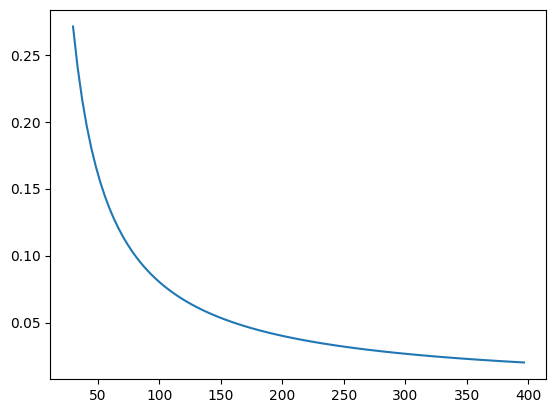

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
from tqdm import tqdm
#Punto 26
n1 = 30
I = 4*(1-(2/n1)-(1/n1**2))
I

Exacto = 4
Error = Exacto - I
Error
def Riemann(n):
    I = 4*(1-(2/n)-(1/n**2))
    Err = abs(4-I)
    return Err
n = np.linspace(30,400,100, endpoint=False)
plt.plot(n,Riemann(n))
# es una mala aproximación si se compara con la cuadratura de Gauss, ya que el orden de error de esta es de e-16

In [ ]:
#21

Ca = 1000000
C = np.array([8.51,10.68,12.24,13.66,15.37,17.15,19.66,24.69])

def FuncionRetorno(Wp,Vp):
  R = np.min(1000000*(Wp*Vp - 1))
  return R

#FuncionRetorno(1000000,np.array([0.5,0.5]),np.array([8.51,10.68]))


In [5]:
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])
x*y

array([ 1,  4,  9, 16, 25])

In [10]:
class Robot:

    def __init__(self,f,Id=0,rate=0.1):

        self.Id = Id
        # Mutation Rate
        self.rate = rate
        self.Fitness = np.inf

        # Funcion a minimizar
        self.f = FuncionRetorno

        # Espacio de parámetros

        self.Cuotas = np.array([8.51,10.68,12.24,13.66,15.37,17.15,19.66,24.69])
        self.r = np.random.uniform(0.,1., size=self.Cuotas.shape[0])
        self.r = self.r / np.sum(self.r)  # Normalizaci ́on inicia

    def Mutate(self):

        self.r += np.random.normal(loc=0., scale=self.rate, size=self.Cuotas.shape[0])
        self.r = np.abs(self.r)  # Asegura que no haya valores negativosself.r = self.r / np.sum(self.r)  # Normaliza para que la suma sea
    def GetR(self):
        return self.r

    def SetFitness(self):
        self.Fitness = self.f(self.r,self.Cuotas)


    def GetFitness(self):
        return self.Fitness

    def __repr__(self):
      return f"Robot {self.r}"

r = Robot(FuncionRetorno)
r.GetR()

NameError: name 'FuncionRetorno' is not defined

In [ ]:
def GetRobots(N):

    Robots = []

    for i in range(N):
        r = Robot(f=f,Id=i)
        Robots.append(r)

    return Robots

In [11]:
GetRobots(10)

NameError: name 'GetRobots' is not defined

In [ ]:
def Plotter(e):

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    ax.set_title('Epoch={:.0f}'.format(e))

    return ax,ax1

In [14]:
def Evolve(Robots, epochs=5000):
    N = int(0.5*len(Robots))

    # Mirar la aptitud más pequeña en cada epoca
    Fitness = np.array([])

    for e in range(int(epochs)):

        # actualizamos informaicíón
        for i,p in enumerate(Robots):
            p.Mutate()
            p.SetFitness()

        #clear_output(wait=True)


        # Ordenamos los robots por fitness
        scores = [ (p.Fitness, p) for p in Robots ]
        scores = sorted(scores,key=lambda x:x[0],reverse=True)

        # Tomamos lo incides hasta el % porciento
        Temp = [r[1] for i,r in enumerate(scores) if i < N ]

        for i in range(int(0.3*len(Robots))):
            Robots[i] = Robot(FuncionRetorno,Id=i)
        for i,r in enumerate(Robots):
          j = i%N
          Robots[i] = copy.deepcopy(Temp[j])



    return Robots

In [12]:
Evolve(GetRobots(500))

NameError: name 'GetRobots' is not defined

In [21]:
import numpy as np

#punto 27
def funcion_definida(x):
    p_0, p_1, p_2, p_3, k_0, k_1, k_2, k_3 = x

    cuadratura = [
        p_0 + p_1 + p_2 + p_3 - 2, p_0*k_0 + p_1*k_1 + p_2*k_2 + p_3*k_3, p_0*k_0**2 + p_1*k_1**2 + p_2*k_2**2 + p_3*k_3**2 - 2/3, p_0*k_0**3 + p_1*k_1**3 + p_2*k_2**3 + p_3*k_3**3, p_0*k_0**4 + p_1*k_1**4 + p_2*k_2**4 + p_3*k_3**4 - 2/5, p_0*k_0**5 + p_1*k_1**5 + p_2*k_2**5 + p_3*k_3**5, p_0*k_0**6 + p_1*k_1**6 + p_2*k_2**6 + p_3*k_3**6 - 2/7, p_0*k_0**7 + p_1*k_1**7 + p_2*k_2**7 + p_3*k_3**7
]
    return np.array(cuadratura)
vec_alea = np.random.uniform(-1, 1, size=8)
def funcion_jacobiano(funcion_definida, x, h=1e-8):
    n = len(x)
    J = np.zeros((n, n))
    fx = funcion_definida(x)
    for i in range(n):
        xh = np.copy(x)
        xh[i] += h
        J[:, i] = (funcion_definida(xh) - fx) / h
    return J
def descenso_grad(funcion_definida, vec_alea, gamma=0.01, tol=1e-5, max_iter=10000, regularization=1e-8):
    x = vec_alea
    for i in range(max_iter):
        l = funcion_jacobiano(funcion_definida, x)
        fx = funcion_definida(x)
        J = l + np.eye(l.shape[0]) * regularization
        delta = np.linalg.pinv(J) @ (-fx)
        x = x + gamma * delta
        if np.linalg.norm(fx) < tol:
            print(f'Convergió después de {i+1} iteraciones.')
            return x
    print('-')
    return x
desarrollo = descenso_grad(funcion_definida, vec_alea)
print('respuesta:', desarrollo)
p_0, p_1, p_2, p_3, k_0, k_1, k_2, k_3 = desarrollo
def cos_inte(desarrollo):
    p_0, p_1, p_2, p_3, k_0, k_1, k_2, k_3 = desarrollo
    return p_0*np.cos(k_0) + p_1*np.cos(k_1) + p_2*np.cos(k_2) + p_3*np.cos(k_3)

resultado_integral = cos_inte(desarrollo)
print(f'respuesta de la integral propuesta: {resultado_integral:.8f}')



-
respuesta: [ 7.37016643e-15  5.14341861e-01  9.66508709e-01  5.19149374e-01
  4.09487981e+01 -8.00120155e-01 -2.87056929e-03  7.97979707e-01]
respuesta de la integral propuesta: 1.68725232
